100%|██████████| 500/500 [00:00<00:00, 2932.31it/s]

tensor([ 0.0656,  0.7076,  0.7076,  2.5707,  2.5707,  5.4726,  5.4726,  9.1292,
         9.1292, 13.1826, 13.1826, 17.2359, 17.2359, 20.8925, 20.8925, 23.7944,
        23.7944, 25.6576, 25.6576, 26.2995], dtype=torch.float64)


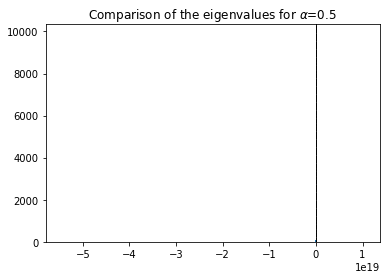

100%|██████████| 500/500 [00:00<00:00, 2203.67it/s]


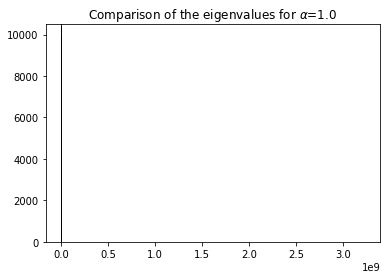

100%|██████████| 500/500 [00:00<00:00, 2430.47it/s]


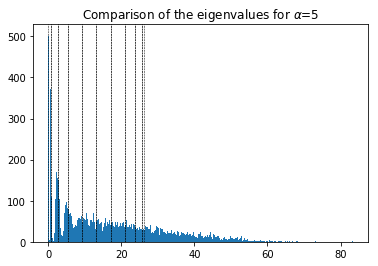

100%|██████████| 500/500 [00:00<00:00, 1712.89it/s]


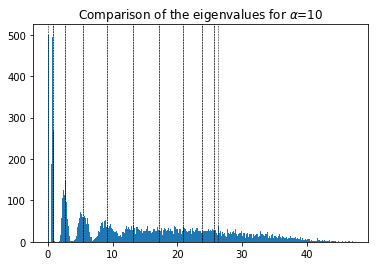

100%|██████████| 500/500 [00:01<00:00, 457.51it/s]


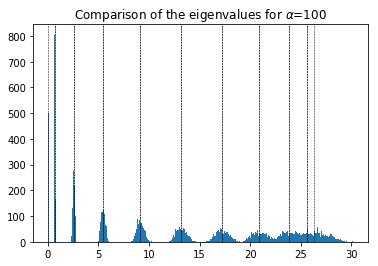

100%|██████████| 500/500 [00:10<00:00, 47.25it/s]


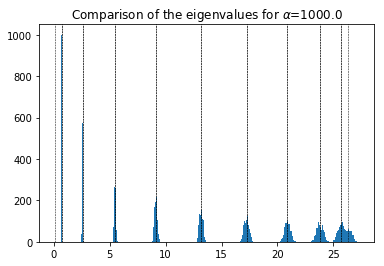

100%|██████████| 500/500 [01:46<00:00,  4.56it/s]


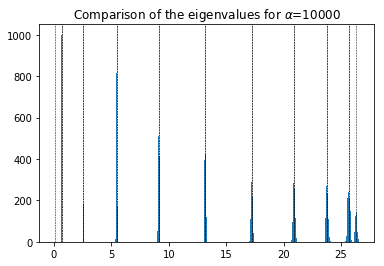

In [1]:
from gaussian_model import CenteredGM
import tqdm
import numpy as np
import torch as tch
import matplotlib.pyplot as plt
%matplotlib inline

N = 20

sigma = np.zeros((N, N))
sigma[0, N - 1] = 1
sigma[N - 1, 0] = 1
for i in range(N - 1):
    sigma[i, i + 1] = 1
    sigma[i + 1, i] = 1
model_to_fit = CenteredGM(N, precision=sigma)

n_evs_to_collect = 10e3

ref, _ = tch.symeig(tch.from_numpy(model_to_fit.precision), eigenvectors=False)
print(ref)

for alpha in [0.5, 1., 5, 10, 100, 1000., 10000]:
    acc = []
    for plop in tqdm.tqdm(range(int(n_evs_to_collect // N))):
        c_emp = model_to_fit.get_empirical_C(alpha * N)
        spectrum, _ = tch.symeig(tch.from_numpy(c_emp), eigenvectors=False)
        acc.extend(1. / spectrum)
        
    plt.figure()
    plt.title(r'Comparison of the eigenvalues for $\alpha$={}'.format(alpha))
    plt.hist(acc, bins=400)
    for v in ref:
        plt.axvline(x=v, c='k', ls='--', lw=.5)
    plt.show()